In [1]:
import pandas as pd
import sqlite3

## 1

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2

In [4]:
df = pd.io.sql.read_sql(
    """
    SELECT datetime
    FROM pageviews
    WHERE uid LIKE "user_%";
    """,
    con=conn
)

## 3

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].apply(lambda r: r.date())
df = df.rename(columns={'datetime': 'date'})
df = df.groupby(by=['date'])['date'].count()

## 4

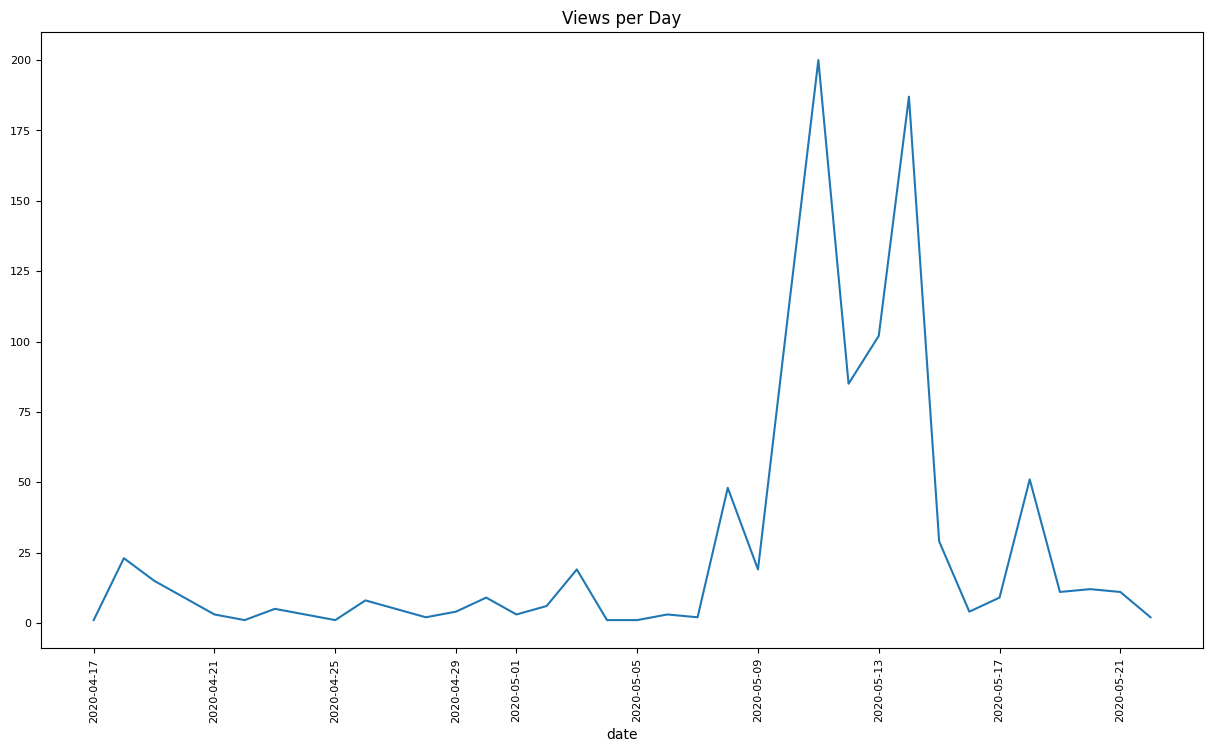

In [10]:
plt = df.plot(fontsize=8, figsize=(15, 8), title='Views per Day', rot=90)

## 5

In [11]:
conn.close()